In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [21]:
flats_mhl = pd.read_csv('data/clean/flats-mhl-clean-v1.csv')
df = flats_mhl.copy()

In [22]:
df.head()

,property_id,property_name,property_type,link,Society,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,A76548347,1BHK 1Bath,Flat/Apartment,https://www.99acres.com/1-bhk-bedroom-apartmen...,NaN,"silver wood sector 115 mohali, Sector 115 Moha...","Sector 115 Mohali, Mohali, Punjab","3,816 per sq.ft.",Carpet area: 600 (55.74 sq.m.) sq.ft.,sq.ft.,1,1,1,Pooja Room,East,2,2,"Others,Park/Garden",New,Concrete,Yes,Furnished,1,0,40.0,"24*7 Water,Municipal corporation",NaN,No,No,70 gaz 1bhk flat for sale in sector-115 mohali...,"['1 Bed', '1 Sofa', '1 Modular Kitchen', '1 Ch...","['Maintenance Staff', 'False Ceiling Lighting'...",0.229
1,W74932323,3BHK 2Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,"foothill, Sector 91 Mohali, Mohali, Punjab","Sector 91 Mohali, Mohali, Punjab","5,428 per sq.ft.",Super Built up area 1800(167.23 sq.m.) sq.ft.,sq.ft.,3,2,3,Others,NaN,2,15,NaN,UndConst,NaN,No,Semifurnished,1,0,NaN,NaN,NaN,No,No,Residential apartment\nThis is your chance to ...,"['3 Wardrobe', 'No AC', 'No Bed', 'No Chimney'...",['Rain Water Harvesting'],0.950
2,L75856079,4BHK 4Baths,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,Kendriya Vihar,"Kendriya Vihar, Sector 125 Mohali, Mohali, Punjab","Phase 1, Sector 125 Mohali, Mohali, Punjab","3,142 per sq.ft.",Super Built up area 1973(183.3 sq.m.)Carpet ar...,sq.ft.,4,4,3,Servant Room,South-East,3,13,Park/Garden,ModOld,Vitrified,Yes,Semifurnished,0,1,NaN,Municipal corporation,NaN,No,No,3 1 bedroom including servant room. \nFlat is ...,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Li...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",0.620
3,E75199257,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,"MEDALLION AURUM, Sas Nagar, Mohali, Punjab","Sas Nagar, Sas Nagar, Mohali, Punjab","8,576 per sq.ft.",Built Up area: 2950 (274.06 sq.m.) sq.ft.,sq.ft.,3,3,3,Servant Room,East,5,18,"Club,Main Road,Park/Garden,Pool",UndConst,Granite,Yes,Semifurnished,2,0,98.4,"24*7 Water,Municipal corporation",Full,Yes,Yes,This is your chance to a 3 bhk apartment / fla...,"['2 Wardrobe', '1 Water Purifier', '1 Exhaust ...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",2.400
4,S60361334,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Aura Avenue,"Aura Avenue, Kharar, Mohali, Punjab","Kharar, Mohali, Punjab","2,956 per sq.ft.",Super Built up area 1860(172.8 sq.m.) sq.ft.,sq.ft.,3,3,3,"Pooja Room,Others",NaN,8,8,"Main Road,Park/Garden",New,Vitrified,Yes,Furnished,1,0,NaN,"24*7 Water,Borewell/Tank",NaN,Yes,Yes,Residential apartment\nThis is your chance to ...,"['1 Water Purifier', '6 Fan', '1 Fridge', '1 E...","['Lift(s)', 'Water Storage', 'Park']",0.550


In [23]:
df['address1']

0       silver wood sector 115 mohali, Sector 115 Moha...
1              foothill, Sector 91 Mohali, Mohali, Punjab
2       Kendriya Vihar, Sector 125 Mohali, Mohali, Punjab
3              MEDALLION AURUM, Sas Nagar, Mohali, Punjab
4                     Aura Avenue, Kharar, Mohali, Punjab
5                     Aks Homes, Zirakpur, Mohali, Punjab
6          Greenview Apartments, Zirakpur, Mohali, Punjab
7       Parkwood Glade, Sector 116 Mohali, Mohali, Punjab
8         Gillco Palms, Sector 115 Mohali, Mohali, Punjab
9       JLPL Regency Heights, Sector 90 Mohali, Mohali...
10       Vera Lok Awas, Sector 74A Mohali, Mohali, Punjab
11                Joynest MOH 1, Zirakpur, Mohali, Punjab
12      homeland regalias, Sector 77 Mohali, Mohali, P...
13      JSJ Josan Heights, Sector 126 Mohali, Mohali, ...
14      JTPL City Mohali, Sector 115 Mohali, Mohali, P...
15               Regalia Towers, Zirakpur, Mohali, Punjab
16      BEVERLY GOLF AVENUE, Sector 66 Mohali, Mohali,...
17      Hero H

In [24]:
def address_func(x):
    if pd.notna(x):
        temp =  x.split(',')
        return temp[-3].strip(),temp[-2].strip()
    else:
        return x

In [25]:
df['address1'].apply(address_func)

0                             (Sector 115 Mohali, Mohali)
1                              (Sector 91 Mohali, Mohali)
2                             (Sector 125 Mohali, Mohali)
3                                     (Sas Nagar, Mohali)
4                                        (Kharar, Mohali)
5                                      (Zirakpur, Mohali)
6                                      (Zirakpur, Mohali)
7                             (Sector 116 Mohali, Mohali)
8                             (Sector 115 Mohali, Mohali)
9                              (Sector 90 Mohali, Mohali)
10                            (Sector 74A Mohali, Mohali)
11                                     (Zirakpur, Mohali)
12                             (Sector 77 Mohali, Mohali)
13                            (Sector 126 Mohali, Mohali)
14                            (Sector 115 Mohali, Mohali)
15                                     (Zirakpur, Mohali)
16                             (Sector 66 Mohali, Mohali)
17            

In [26]:
temp_df = df['address1'].apply(address_func).apply(pd.Series)
temp_df.columns = ['Sector','City']
temp_df

,Sector,City
0,Sector 115 Mohali,Mohali
1,Sector 91 Mohali,Mohali
2,Sector 125 Mohali,Mohali
3,Sas Nagar,Mohali
4,Kharar,Mohali
5,Zirakpur,Mohali
6,Zirakpur,Mohali
7,Sector 116 Mohali,Mohali
8,Sector 115 Mohali,Mohali
9,Sector 90 Mohali,Mohali


In [27]:
df.insert(5,'City',value = temp_df['City'].values)
df.insert(5,'Sector',value = temp_df['Sector'].values)

In [28]:
# 133
df['Sector'].value_counts()

Sector
Zirakpur                                   293
Sector 88 Mohali                           206
Sector 115 Mohali                          139
Sector 66b Mohali                          138
Sector 66A Mohali                          131
Kharar                                     125
Aerocity                                   120
Sector 127 Mohali                          115
Sector 91 Mohali                           105
Sector 82 Mohali                           103
Sector 126 Mohali                           93
Sector 99 Mohali                            63
Sector 117 Mohali                           56
Sector 105 Mohali                           54
Sector 116 Mohali                           53
Dhakoli                                     44
Sector 85 Mohali                            42
Sector 123 Sunny Enclave                    32
Sector 65 Mohali                            30
Sector 70 Mohali                            28
Sector 125 Mohali                           28
Sector

In [29]:
def sector_filt(sector):
    return df[df['Sector'] == sector][['Society','Sector','City']]

In [33]:
def society_filt(sector):
    return df[df['Society'] == sector][['Society','Sector','City']]

In [30]:
def sector_clean(x):
    if pd.notna(x):
        if x.startswith('Sector'):
            output_str = re.sub(r'(\d+)([A-Za-z])', r'\1', x)
            return output_str
        elif x[0].isdigit():
            output_str = re.sub(r'\d+[A-Za-z]', '', x, count=1)
            return output_str.strip()
        else:
            return x
    else:
        return x

In [31]:
df['Sector'] = df['Sector'].apply(sector_clean)

In [34]:
df['Sector'].value_counts()

Sector
Zirakpur                                   293
Sector 66 Mohali                           285
Sector 88 Mohali                           206
Sector 115 Mohali                          139
Kharar                                     125
Aerocity                                   120
Sector 127 Mohali                          115
Sector 82 Mohali                           105
Sector 91 Mohali                           105
Sector 126 Mohali                           93
Sector 99 Mohali                            63
Sector 117 Mohali                           56
Sector 105 Mohali                           54
Sector 116 Mohali                           53
Dhakoli                                     44
Sector 85 Mohali                            42
Sector 123 Sunny Enclave                    32
Sector 65 Mohali                            30
Sector 125 Mohali                           28
Sector 70 Mohali                            28
Sector 74 Mohali                            26
Sas Na

In [38]:
sector_filt('Sector 125 Mohali')

,Society,Sector,City
2,Kendriya Vihar,Sector 125 Mohali,Mohali
41,NaN,Sector 125 Mohali,Mohali
93,NaN,Sector 125 Mohali,Mohali
158,NaN,Sector 125 Mohali,Mohali
163,NaN,Sector 125 Mohali,Mohali
169,NaN,Sector 125 Mohali,Mohali
187,NaN,Sector 125 Mohali,Mohali
494,NaN,Sector 125 Mohali,Mohali
609,NaN,Sector 125 Mohali,Mohali
614,Sunny Enclave,Sector 125 Mohali,Mohali


In [37]:
temp_rows = sector_filt('Sector 123 Sunny Enclave').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [39]:
temp_rows = sector_filt('Sector 125 Mohali').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [40]:
df['Sector'].value_counts()

Sector
Zirakpur                                   293
Sector 66 Mohali                           285
Sector 88 Mohali                           206
Kharar                                     185
Sector 115 Mohali                          139
Aerocity                                   120
Sector 127 Mohali                          115
Sector 91 Mohali                           105
Sector 82 Mohali                           105
Sector 126 Mohali                           93
Sector 99 Mohali                            63
Sector 117 Mohali                           56
Sector 105 Mohali                           54
Sector 116 Mohali                           53
Dhakoli                                     44
Sector 85 Mohali                            42
Sector 65 Mohali                            30
Sector 70 Mohali                            28
Sector 74 Mohali                            26
Sas Nagar                                   22
Sunny Enclave                               20
Sector

In [45]:
sector_filt('Sas Nagar')

,Society,Sector,City
3,NaN,Sas Nagar,Mohali
261,Sandwoods Opulencia,Sas Nagar,Mohali
291,Sandwoods Opulencia,Sas Nagar,Mohali
306,Sandwoods Opulencia,Sas Nagar,Mohali
309,Sandwoods Opulencia,Sas Nagar,Mohali
312,Sandwoods Opulencia,Sas Nagar,Mohali
314,Sandwoods Opulencia,Sas Nagar,Mohali
321,Sandwoods Opulencia,Sas Nagar,Mohali
459,Sandwoods Opulencia,Sas Nagar,Mohali
472,Sandwoods Opulencia,Sas Nagar,Mohali


In [42]:
df.loc[sector_filt('Sas Nagar').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
3,E75199257,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Sas Nagar,Mohali,"MEDALLION AURUM, Sas Nagar, Mohali, Punjab","Sas Nagar, Sas Nagar, Mohali, Punjab","8,576 per sq.ft.",Built Up area: 2950 (274.06 sq.m.) sq.ft.,sq.ft.,3,3,3,Servant Room,East,5,18,"Club,Main Road,Park/Garden,Pool",UndConst,Granite,Yes,Semifurnished,2,0,98.4,"24*7 Water,Municipal corporation",Full,Yes,Yes,This is your chance to a 3 bhk apartment / fla...,"['2 Wardrobe', '1 Water Purifier', '1 Exhaust ...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",2.4000
261,R76688959,3BHK 2Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Sandwoods Opulencia,Sas Nagar,Mohali,"Sandwoods Opulencia, Sas Nagar, Mohali, Punjab","12010, Sas Nagar, Mohali, Punjab","4,690 per sq.ft.",Super Built up area 1375(127.74 sq.m.)Built Up...,sq.ft.,3,2,3,Study Room,East,9,12,"Club,Main Road,Park/Garden,Pool",New,Ceramic,Yes,Unfurnished,0,0,200.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,"Sandwoods opulencia in sector 110, mohali, off...",NaN,"['Water purifier', 'Security / Fire Alarm', 'P...",0.6450
291,H70667690,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Sandwoods Opulencia,Sas Nagar,Mohali,"Sandwoods Opulencia, Sas Nagar, Mohali, Punjab","0000, Sas Nagar, Mohali, Punjab","3,877 per sq.ft.",Super Built up area 2192(203.64 sq.m.)Carpet a...,sq.ft.,3,3,2,"Servant Room,Store Room",North-East,9,22,"Club,Main Road,Park/Garden,Pool",RelNew,Wood,No,Semifurnished,1,1,80.0,"24*7 Water,Borewell/Tank",Full,Yes,Yes,Sandwoods opulencia is one of mohali's most so...,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Water purifier', 'Maintenance Staff', 'Swimm...",0.8500
306,A71105240,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Sandwoods Opulencia,Sas Nagar,Mohali,"Sandwoods Opulencia, Sas Nagar, Mohali, Punjab","Sas Nagar, Mohali, Punjab","3,649 per sq.ft.",Super Built up area 2192(203.64 sq.m.)Carpet a...,sq.ft.,3,3,3,Others,North-East,15,22,"Club,Main Road,Park/Garden,Pool",RelNew,Wood,Yes,Semifurnished,1,1,NaN,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,This 3 bhk flat is located in sandwoods opulen...,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Security / Fire Alarm', 'Maintenance Staff',...",0.8000
309,S66673840,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Sandwoods Opulencia,Sas Nagar,Mohali,"Sandwoods Opulencia, Sas Nagar, Mohali, Punjab","Sas Nagar, Mohali, Punjab","3,626 per sq.ft.",Super Built up area 2192(203.64 sq.m.)Carpet a...,sq.ft.,3,3,3,"Pooja Room,Study Room,Servant Room",South,15,22,"Club,Main Road,Park/Garden,Pool",RelNew,Wood,Yes,Semifurnished,1,1,80.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,This 3 bhk apartment is available for sale in ...,"['3 Geyser', '1 Modular Kitchen', '1 Chimney',...","['Private Garden / Terrace', 'Maintenance Staf...",0.7950
312,V70667754,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Sandwoods Opulencia,Sas Nagar,Mohali,"Sandwoods Opulencia, Sas Nagar, Mohali, Punjab","0000, Sas Nagar, Mohali, Punjab","3,558 per sq.ft.",Super Built up area 2192(203.64 sq.m.)Carpet a...,sq.ft.,3,3,2,"Servant Room,Store Room",North-East,14,22,"Club,Main Road,Park/Garden,Pool",RelNew,Wood,No,Semifurnished,1,1,80.0,"24*7 Water,Borewell/Tank",Full,Yes,Yes,Check out this 3 bhk apartment for sale in san...,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Water purifier', 'Maintenance Staff', 'Swimm...",0.7800
314,V71105152,3BHK 4Baths,Fl

In [47]:
temp_rows = society_filt('Sandwoods Opulencia').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Sector 110 Mohali'

In [48]:
temp_rows = society_filt('AV Gobind Enclave Greens').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Sector 117 Mohali'

In [51]:
df.drop(sector_filt('Sas Nagar').index,inplace = True)

In [55]:
temp_rows = sector_filt('Sunny Enclave').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [56]:
df['Sector'].value_counts()

Sector
Zirakpur                                   293
Sector 66 Mohali                           285
Sector 88 Mohali                           206
Kharar                                     205
Sector 115 Mohali                          139
Aerocity                                   120
Sector 127 Mohali                          115
Sector 91 Mohali                           105
Sector 82 Mohali                           105
Sector 126 Mohali                           93
Sector 99 Mohali                            63
Sector 117 Mohali                           59
Sector 105 Mohali                           54
Sector 116 Mohali                           53
Dhakoli                                     44
Sector 85 Mohali                            42
Sector 110 Mohali                           31
Sector 65 Mohali                            30
Sector 70 Mohali                            28
Sector 74 Mohali                            26
Sector 121 Mohali                           17
Sector

In [60]:
df['Society'].value_counts()

Society
Hero Homes Mohali                        113
Ambika La Parisian                        99
Joynest MOH 1                             78
JLPL Falcon View                          63
Purab Premium Apartments                  58
Uptown Skylla                             52
Turnstone The Medallion                   49
Gillco Parkhills                          49
SBP City of Dreams                        41
One Rise                                  38
Noble Callista                            38
JTPL City Mohali                          34
Beverly Golf Avenue                       30
JLPL Galaxy Heights                       29
JLPL Sky Gardens                          25
Shivalik City                             25
Affinity Belgravia                        22
Wave Gardens                              19
TDI Wellington Heights                    19
Leela Orchid Greens                       17
ATS Casa Espana                           17
Noble Willasa                             17
Ac

In [63]:
sect_remove = list(df['Sector'].value_counts()[df['Sector'].value_counts() < 2].index)

In [64]:
sect_remove

['ZIRAKPUR PATIALA HIGHWAY',
 'dera bassi',
 'chandigarh ludhiana highway',
 'the antares',
 'Pre launch projects in Mohali',
 'chandighar ludhiana',
 'AIRPORT ROAD I BLOCK',
 'marbella royce',
 'Marbella Royce',
 'Sector 68',
 'escon',
 'MOHALI',
 'Gharuan',
 'Pre Launch Flat or apartments in Mohali',
 'Sector 104 Municipal heights',
 'Mohali',
 'sector 90',
 'mohali city',
 'Maya garden phase 2',
 'Main Bazar',
 'Opera garden',
 'Khuni Majra',
 'Kansal',
 'rajpura',
 'co operative society',
 'Chajju Majra Colony',
 'shivalik city 127 sec',
 'SBP CITY OF DREAMS SECTOR 116',
 'Kharar Kurali Road Mohali',
 'raglans gulmohar city extention',
 'Sector 64 Mohali',
 'i block Aerocity',
 'gbm appartment kharar',
 'Punjab',
 'TDI City',
 'Lohgarh',
 'Patiala Road Zirakpur Near Airport Road',
 'Ward No 10',
 'Guru Teg Bahadur Nagar',
 'Khanpur',
 'uptown skylla',
 'Patiala Road',
 'Silver City Extension',
 'Landran Banur Road',
 'Sector 71 Mohali',
 'Kurali',
 'Market',
 'Ludhiana Highway',
 '

In [67]:
sect_keep = ['dera bassi','SBP CITY OF DREAMS SECTOR 116','Sector 64 Mohali','i block Aerocity','SBP CITY OF DREAMS Sector 115 Mohali','Phase 5 Mohali']

In [68]:
for i in sect_keep:
    sect_remove.remove(i)

In [70]:
row_drop = []
for i in sect_remove:
    row_drop += list(sector_filt(i).index)

In [72]:
df.drop(row_drop,inplace = True)

In [78]:
df.drop(sector_filt('Kharar Landran Road').index,inplace = True)

In [82]:
df.loc[sector_filt('Airport Road').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
476,Q76690199,3BHK 2Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Airport Road,Mohali,"ESCON PRIMERA, Airport Road, Mohali, Punjab","Airport Road, Mohali, Punjab","6,387 per sq.ft.",Super Built up area 1550(144 sq.m.)Carpet area...,sq.ft.,3,2,2,NaN,NaN,8,17,NaN,New,NaN,Yes,Unfurnished,2,0,NaN,NaN,Full,No,No,"Park/garden,pool,club,main road,others",NaN,NaN,0.99
542,H76377427,4BHK 4Baths,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,NaN,Airport Road,Mohali,"Green Lotus Utsav, Airport Road, Mohali, Punjab","Airport Road, Mohali, Punjab","14,072 per sq.ft.",Super Built up area 3130(290.79 sq.m.)Built Up...,sq.ft.,4,4,4,Pooja Room,East,6,13,Park/Garden,UndConst,Marble,Yes,Semifurnished,2,0,200.0,"24*7 Water,Borewell/Tank",Full,No,Yes,In mivan construction and gated society with 3...,"['1 Water Purifier', '6 Fan', '1 Fridge', '1 E...","['Water purifier', 'Security / Fire Alarm', 'F...",2.45
759,N74618467,3BHK 2Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Airport Road,Mohali,"Sushma Capital, Airport Road, Mohali, Punjab","M401, Airport Road, Mohali, Punjab","6,159 per sq.ft.",Carpet area: 1380 (128.21 sq.m.) sq.ft.,sq.ft.,3,2,1,Pooja Room,North-East,4,8,Main Road,RelNew,Wood,Yes,Unfurnished,1,0,NaN,24*7 Water,Full,No,No,"North-East facing , dedicated separate carpark...",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",0.85
898,H76434651,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Airport Road,Mohali,"Escon primera, Airport Road, Mohali, Punjab","Airport Road, Mohali, Punjab","7,707 per sq.ft.",Super Built up area 2050(190.45 sq.m.)Carpet a...,sq.ft.,3,3,4,Pooja Room,East,5,17,"Club,Main Road,Park/Garden,Pool",UndConst,Vitrified,Yes,Semifurnished,2,0,60.0,"24*7 Water,Borewell/Tank",Full,No,Yes,This is located on mohali airport road bang on...,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Security / F...",1.58
921,A73575213,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Uptown Skylla,Airport Road,Mohali,"Uptown Skylla, Airport Road, Mohali, Punjab","Airport Road, Mohali, Punjab","8,794 per sq.ft.",Super Built up area 1505(139.82 sq.m.)Carpet a...,sq.ft.,3,3,3,"Pooja Room,Study Room",North-East,3,13,"Club,Main Road,Others,Park/Garden,Pool",New,Concrete,Yes,Semifurnished,1,1,200.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,This 3bhk apartment is available for sale in u...,"['1 Wardrobe', '1 Modular Kitchen', 'No AC', '...","['Centrally Air Conditioned', 'Security / Fire...",0.97
1159,Y76382913,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Airport Road,Mohali,"On Airport Road, Airport Road, Mohali, Punjab","Airport Road, Mohali, Punjab","7,719 per sq.ft.",Super Built up area 1300(120.77 sq.m.) sq.ft.,sq.ft.,2,2,3,NaN,North-East,14,14,NaN,UndConst,NaN,Yes,NaN,1,0,NaN,NaN,NaN,No,Yes,"The best project in the tri-City, spacious roo...",[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1.00
1294,W74977391,3BHK 4Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Airport Road,Mohali,"JLPL Falcon View, Airport Road, Mohali, Punjab","703, Airport Road, Mohali, Punjab","8,665 per sq.ft.",Super Built up area 2481(230.49 sq.m.)Built Up...,sq.ft.,3,4,4,"Servant Room,Pooja Room,Store Room",South-West,7,15,"Main Road,Others",New,Vitrified,Yes,Semifurnished,2,1,60.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,Jlpl falcon view is one of mohali's most sough...,"['1 Modular Kitchen', 'No AC', 'No Bed

In [83]:
temp_rows = sector_filt('Airport Road').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Zirakpur'

In [84]:
df['Sector'].value_counts()

Sector
Zirakpur                                309
Sector 66 Mohali                        285
Sector 88 Mohali                        206
Kharar                                  205
Sector 115 Mohali                       139
Aerocity                                120
Sector 127 Mohali                       115
Sector 91 Mohali                        105
Sector 82 Mohali                        105
Sector 126 Mohali                        93
Sector 99 Mohali                         63
Sector 117 Mohali                        59
Sector 105 Mohali                        54
Sector 116 Mohali                        53
Dhakoli                                  44
Sector 85 Mohali                         42
Sector 110 Mohali                        31
Sector 65 Mohali                         30
Sector 70 Mohali                         28
Sector 74 Mohali                         26
Sector 113 Mohali                        17
Sector 121 Mohali                        17
Sector 90 Mohali         

In [85]:
temp_rows = sector_filt('Pabhat').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Zirakpur'

In [86]:
temp_rows = sector_filt('Sector 127 Kharar').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [87]:
temp_rows = sector_filt('Mullanpur Garibdass').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Mullanpur'

In [90]:
temp_rows = sector_filt('Nabha Sahib').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Zirakpur'

In [92]:
df.loc[sector_filt('Singhpura').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
2325,F75200993,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Singhpura,Mohali,"green lotus apartment, Singhpura, Mohali, Punjab","Singhpura, Mohali, Punjab","1,822 per sq.ft.",Carpet area: 1750 (162.58 sq.m.) sq.ft.,sq.ft.,3,3,3,NaN,NaN,0,3,NaN,New,NaN,No,NaN,0,0,NaN,NaN,NaN,No,No,Low price and good location good socaty,[],NaN,0.319
2387,R74712261,4BHK 4Baths,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,NaN,Singhpura,Mohali,"Maya Garden Monopolis, Singhpura, Mohali, Punjab","Flat No 401 Tower I3, Singhpura, Mohali, Punjab","5,454 per sq.ft.",Carpet area: 1650 (153.29 sq.m.) sq.ft.,sq.ft.,4,4,4,"Pooja Room,Others",North-East,4,11,NaN,UndConst,Marble,Yes,Furnished,1,0,NaN,NaN,Partial,No,Yes,4bhk with 2 entrances approach from 200 ft hig...,"['1 Water Purifier', '1 Fridge', '5 Fan', '4 G...","['Lift(s)', 'Water Storage', 'Park', 'Visitor ...",0.900


In [94]:
df.drop(2325,inplace = True)

In [95]:
df['Sector'].loc[2387] = 'Zirakpur'

In [97]:
df.loc[sector_filt('Sector 123 Sihanpur').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
646,B75614669,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Sector 123 Sihanpur,Mohali,"aero homes 2, Sector 123 Sihanpur, Mohali, Punjab","Sector 123 Sihanpur, Mohali, Punjab","52,000 per sq.yards",Carpet area: 125 (104.52 sq.m.) sq.yards,sq.yards,3,3,0,NaN,NaN,0,3,NaN,RelNew,NaN,No,Semifurnished,0,1,NaN,NaN,NaN,No,No,Residential apartment for sell.Located on grou...,"['3 Wardrobe', '3 Fan', '3 Light', 'No AC', 'N...",NaN,0.650
1280,Q76633367,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Serenity Sky,Sector 123 Sihanpur,Mohali,"Serenity Sky, Sector 123 Sihanpur, Mohali, Punjab","Sector 123 Sihanpur, Mohali, Punjab","5,200 per sq.ft.",Carpet area: 1150 (106.84 sq.m.) sq.ft.,sq.ft.,3,3,2,NaN,East,2,3,Park/Garden,UndConst,Vitrified,Yes,Semifurnished,1,1,35.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,200 mt from airport road.\n 5 min drive to cha...,"['3 Wardrobe', '10 Light', '1 Modular Kitchen'...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",0.598
1281,Z76607973,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Serenity Sky,Sector 123 Sihanpur,Mohali,"Serenity Sky, Sector 123 Sihanpur, Mohali, Punjab","Sector 123 Sihanpur, Mohali, Punjab","6,611 per sq.ft.",Carpet area: 900 (83.61 sq.m.) sq.ft.,sq.ft.,3,3,2,NaN,East,2,3,Park/Garden,UndConst,Vitrified,Yes,Semifurnished,1,1,35.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,200 mt from airport road.\n 5 min drive to cha...,"['3 Wardrobe', '10 Light', 'No AC', 'No Bed', ...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",0.595
1446,J73080455,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Sector 123 Sihanpur,Mohali,"prisma city, Sector 123 Sihanpur, Mohali, Punjab","Sector 123, Sector 123 Sihanpur, Mohali, Punjab","6,100 per sq.ft.",Super Built up area 1240(115.2 sq.m.)Built Up ...,sq.ft.,3,3,3,Store Room,North-East,1,3,"Club,Main Road,Others,Park/Garden,Pool",UndConst,Wood,Yes,Semifurnished,1,1,35.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,Located in the popular residential address of ...,"['2 Wardrobe', '2 Light', '1 Modular Kitchen',...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...",0.610
1447,L73078963,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Sector 123 Sihanpur,Mohali,"santosh home, Sector 123 Sihanpur, Mohali, Punjab","Sector 123 Sihanpur, Mohali, Punjab","4,900 per sq.ft.",Super Built up area 1200(111.48 sq.m.)Carpet a...,sq.ft.,3,3,3,NaN,North-East,1,3,"Club,Main Road,Others,Park/Garden,Pool",New,Wood,Yes,Semifurnished,0,1,35.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,Yes,Looking for a 3 bhk property for sale in mohal...,"['3 Wardrobe', '1 Fan', '1 Geyser', '3 Light',...","['Lift(s)', 'High Ceiling Height', 'False Ceil...",0.490
2328,I75173877,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Sector 123 Sihanpur,Mohali,"vinayak homes, Sector 123 Sihanpur, Mohali, Pu...","Sector 123 Sihanpur, Mohali, Punjab","4,200 per sq.ft.",Built Up area: 1000 (92.9 sq.m.) sq.ft.,sq.ft.,2,2,0,NaN,NaN,0,3,NaN,RelNew,NaN,No,Furnished,0,1,NaN,NaN,NaN,No,No,Residential apartment for sell.Located on grou...,"['1 Bed', '2 Wardrobe', '2 Fan', '1 Fridge', '...",NaN,0.420
2422,J72046440,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Sector 123 Sihanpur,Mohali,"digital town mohali, Sector 123 Sihanpur, Moha...","Sector 123 Sihanpur, Mohali, Punjab","2,900 per sq.ft.",Super Built up area 1000(92.9 sq.m.) sq.ft.,s

In [98]:
df.drop(646,inplace = True)

In [99]:
temp_rows = sector_filt('Sector 123 Sihanpur').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [100]:
df['Sector'].value_counts()

Sector
Zirakpur                                324
Sector 66 Mohali                        285
Kharar                                  222
Sector 88 Mohali                        206
Sector 115 Mohali                       139
Aerocity                                120
Sector 127 Mohali                       115
Sector 82 Mohali                        105
Sector 91 Mohali                        105
Sector 126 Mohali                        93
Sector 99 Mohali                         63
Sector 117 Mohali                        59
Sector 105 Mohali                        54
Sector 116 Mohali                        53
Dhakoli                                  44
Sector 85 Mohali                         42
Sector 110 Mohali                        31
Sector 65 Mohali                         30
Sector 70 Mohali                         28
Sector 74 Mohali                         26
Sector 121 Mohali                        17
Sector 113 Mohali                        17
Sector 90 Mohali         

In [102]:
temp_rows = sector_filt('Gazipur').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Zirakpur'

In [103]:
temp_rows = sector_filt('derabassi').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Dera Bassi'

In [104]:
temp_rows = sector_filt('dera bassi').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Dera Bassi'

In [105]:
temp_rows = sector_filt('Sector-125 Kharar').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [106]:
temp_rows = sector_filt('Kharar Mohali').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [107]:
temp_rows = sector_filt('Shivalik City').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Sector 127 Mohali'

In [108]:
df.drop(sector_filt('Banur').index,inplace = True)

In [109]:
temp_rows = sector_filt('Sector-120 Mohali').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Sector 120 Mohali'

In [110]:
temp_rows = sector_filt('Phase 11 Sector 65 Mohali').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Phase 11 Mohali'

In [111]:
df['Sector'].value_counts()

Sector
Zirakpur                                330
Sector 66 Mohali                        285
Kharar                                  228
Sector 88 Mohali                        206
Sector 115 Mohali                       139
Aerocity                                120
Sector 127 Mohali                       120
Sector 91 Mohali                        105
Sector 82 Mohali                        105
Sector 126 Mohali                        93
Sector 99 Mohali                         63
Sector 117 Mohali                        59
Sector 105 Mohali                        54
Sector 116 Mohali                        53
Dhakoli                                  44
Sector 85 Mohali                         42
Sector 110 Mohali                        31
Sector 65 Mohali                         30
Sector 70 Mohali                         28
Sector 74 Mohali                         26
Sector 113 Mohali                        17
Sector 121 Mohali                        17
Sector 90 Mohali         

In [112]:
temp_rows = sector_filt('Mundi Kharar').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [113]:
sector_filt('Nabha')

,Society,Sector,City
1357,SRB Lifestyle Homes,Nabha,Mohali
1538,NaN,Nabha,Mohali


In [114]:
temp_rows = sector_filt('Nabha').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Zirakpur'

In [115]:
temp_rows = sector_filt('Sante Majra Colony').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Sector 127 Mohali'

In [116]:
temp_rows = sector_filt('Sante Majra').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Sector 127 Mohali'

In [117]:
df.drop(sector_filt('Dayalpura').index,inplace = True)

In [119]:
df.loc[sector_filt('PR7 Road').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
514,Q76507283,4BHK 4Baths,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,NaN,PR7 Road,Mohali,"Green Lotus Utsav, PR7 Road, Mohali, Punjab","PR7 Road, Mohali, Punjab","7,326 per sq.ft.",Built Up area: 2525 (234.58 sq.m.)Carpet area:...,sq.ft.,4,4,3,"Pooja Room,Servant Room",East,1,13,"Club,Park/Garden,Pool",UndConst,Marble,Yes,Unfurnished,2,0,200.0,"24*7 Water,Borewell/Tank",Full,Yes,Yes,Bang on highway with more than 50% green area ...,NaN,"['Water purifier', 'Security / Fire Alarm', 'F...",1.85
2232,O75786459,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,PR7 Road,Mohali,"GREEN LOTUS UTSAV, PR7 Road, Mohali, Punjab","PR7 Road, Mohali, Punjab","8,200 per sq.ft.",Super Built up area 2525(234.58 sq.m.)Built Up...,sq.ft.,3,3,3,"Pooja Room,Servant Room",East,12,13,"Club,Main Road,Park/Garden",UndConst,Marble,Yes,Semifurnished,2,0,150.0,"24*7 Water,Borewell/Tank,Municipal corporation",Full,Yes,No,"Only platinum rated, ultra luxurious hirise so...","['1 Water Purifier', '3 Fan', '1 Fridge', '1 E...","['Centrally Air Conditioned', 'Water purifier'...",2.07


In [120]:
temp_rows = sector_filt('PR7 Road').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Aerocity'

In [121]:
df['Sector'].value_counts()

Sector
Zirakpur                                332
Sector 66 Mohali                        285
Kharar                                  230
Sector 88 Mohali                        206
Sector 115 Mohali                       139
Sector 127 Mohali                       124
Aerocity                                122
Sector 91 Mohali                        105
Sector 82 Mohali                        105
Sector 126 Mohali                        93
Sector 99 Mohali                         63
Sector 117 Mohali                        59
Sector 105 Mohali                        54
Sector 116 Mohali                        53
Dhakoli                                  44
Sector 85 Mohali                         42
Sector 110 Mohali                        31
Sector 65 Mohali                         30
Sector 70 Mohali                         28
Sector 74 Mohali                         26
Sector 121 Mohali                        17
Sector 113 Mohali                        17
Sector 90 Mohali         

In [122]:
temp_rows = sector_filt('i block Aerocity').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Aerocity'

In [123]:
temp_rows = sector_filt('Utrathiya').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Zirakpur'

In [124]:
df['Sector'].value_counts()

Sector
Zirakpur                                334
Sector 66 Mohali                        285
Kharar                                  230
Sector 88 Mohali                        206
Sector 115 Mohali                       139
Sector 127 Mohali                       124
Aerocity                                123
Sector 91 Mohali                        105
Sector 82 Mohali                        105
Sector 126 Mohali                        93
Sector 99 Mohali                         63
Sector 117 Mohali                        59
Sector 105 Mohali                        54
Sector 116 Mohali                        53
Dhakoli                                  44
Sector 85 Mohali                         42
Sector 110 Mohali                        31
Sector 65 Mohali                         30
Sector 70 Mohali                         28
Sector 74 Mohali                         26
Sector 113 Mohali                        17
Sector 121 Mohali                        17
Sector 90 Mohali         

In [125]:
temp_rows = sector_filt('Sector 124 Mohali').index
for i in temp_rows:
    df['Sector'].loc[i] = 'Kharar'

In [127]:
df['Society'].value_counts()

Society
Hero Homes Mohali                        113
Ambika La Parisian                        99
Joynest MOH 1                             78
JLPL Falcon View                          63
Purab Premium Apartments                  58
Uptown Skylla                             51
Turnstone The Medallion                   49
Gillco Parkhills                          49
SBP City of Dreams                        41
One Rise                                  38
Noble Callista                            38
JTPL City Mohali                          34
Beverly Golf Avenue                       30
JLPL Galaxy Heights                       29
JLPL Sky Gardens                          25
Shivalik City                             24
Affinity Belgravia                        22
Wave Gardens                              19
TDI Wellington Heights                    19
Leela Orchid Greens                       17
ATS Casa Espana                           17
Noble Willasa                             17
Ac

In [126]:
sector_filt('SBP CITY OF DREAMS Sector 115 Mohali')

,Society,Sector,City
1334,NaN,SBP CITY OF DREAMS Sector 115 Mohali,Mohali


In [129]:
sector_filt('SBP CITY OF DREAMS SECTOR 116')

,Society,Sector,City
674,NaN,SBP CITY OF DREAMS SECTOR 116,Mohali


In [128]:
society_filt('SBP City of Dreams')

,Society,Sector,City
460,SBP City of Dreams,Sector 127 Mohali,Mohali
479,SBP City of Dreams,Sector 127 Mohali,Mohali
499,SBP City of Dreams,Zirakpur,Mohali
513,SBP City of Dreams,Sector 127 Mohali,Mohali
539,SBP City of Dreams,Sector 127 Mohali,Mohali
719,SBP City of Dreams,Sector 127 Mohali,Mohali
862,SBP City of Dreams,Sector 127 Mohali,Mohali
1026,SBP City of Dreams,Sector 127 Mohali,Mohali
1081,SBP City of Dreams,Sector 127 Mohali,Mohali
1106,SBP City of Dreams,Sector 127 Mohali,Mohali


In [130]:
for i in [1334,674]:
    df['Sector'].loc[i] = 'Sector 127 Mohali'
    df['Society'].loc[i] = 'SBP City of Dreams'
    

In [131]:
df['Sector'].value_counts()

Sector
Zirakpur                      334
Sector 66 Mohali              285
Kharar                        236
Sector 88 Mohali              206
Sector 115 Mohali             139
Sector 127 Mohali             126
Aerocity                      123
Sector 91 Mohali              105
Sector 82 Mohali              105
Sector 126 Mohali              93
Sector 99 Mohali               63
Sector 117 Mohali              59
Sector 105 Mohali              54
Sector 116 Mohali              53
Dhakoli                        44
Sector 85 Mohali               42
Sector 110 Mohali              31
Sector 65 Mohali               30
Sector 70 Mohali               28
Sector 74 Mohali               26
Sector 113 Mohali              17
Sector 121 Mohali              17
Sector 90 Mohali               16
Sector 67 Mohali               12
Sector 83 Mohali               11
Sector 114 Mohali              11
Sector 79 Mohali               10
Sector 86 Mohali                9
Sector 104 Mohali               8
Sector 

In [133]:
df.loc[sector_filt('Phase 5 Mohali').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
2425,B71538018,3BHK 1Bath,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Phase 5 Mohali,Mohali,"PTL Apartment, Phase 5 Mohali, Mohali, Punjab","Phase 5 Mohali, Mohali, Punjab","1,00,000 per sq.yards",Carpet area: 50 (41.81 sq.m.) sq.yards,sq.yards,3,1,0,NaN,NaN,0,3,NaN,Old,NaN,No,Semifurnished,0,0,NaN,NaN,NaN,No,No,He independent 3 bedroom ground floor on prime...,"['4 Bed', '4 Fan', '1 Geyser', '4 Light', 'No ...",NaN,0.5


In [135]:
df.drop(2425,inplace = True)

In [137]:
df.loc[sector_filt('Sahibzada Ajit Singh Nagar').index]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
507,R76549179,3BHK 2Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Wave Avenue 99,Sahibzada Ajit Singh Nagar,Mohali,"Wave Avenue 99, Sahibzada Ajit Singh Nagar, Mo...","Sahibzada Ajit Singh Nagar, Mohali, Punjab","4,444 per sq.ft.",Super Built up area 1800(167.23 sq.m.) sq.ft.,sq.ft.,3,2,2,NaN,NaN,2,3,Park/Garden,RelNew,Wood,Yes,Unfurnished,0,1,NaN,"24*7 Water,Municipal corporation",Full,No,Yes,Newly built up 3 bhk in posh locality and in t...,NaN,"['Power Back-up', 'Security / Fire Alarm', 'Sw...",0.800
2203,R75924437,2BHK 2Baths,Flat/Apartment,https://www.99acres.com/2-bhk-bedroom-apartmen...,NaN,Sahibzada Ajit Singh Nagar,Mohali,"sukh city, Sahibzada Ajit Singh Nagar, Mohali,...","Sahibzada Ajit Singh Nagar, Mohali, Punjab","37,766 per sq.yards",Carpet area: 103 (86.12 sq.m.) sq.yards,sq.yards,2,2,2,Others,East,0,4,"Club,Main Road,Others,Park/Garden",ModOld,Marble,Yes,Furnished,0,0,200.0,24*7 Water,Full,No,Yes,This lovely 2 bhk apartment/flat in sector 123...,"['2 Bed', '2 Wardrobe', '3 Fan', '1 Sofa', '1 ...","['Security / Fire Alarm', 'Intercom Facility',...",0.389


In [138]:
df.drop(sector_filt('Sahibzada Ajit Singh Nagar').index,inplace = True)

In [139]:
df['Sector'].value_counts()

Sector
Zirakpur             334
Sector 66 Mohali     285
Kharar               236
Sector 88 Mohali     206
Sector 115 Mohali    139
Sector 127 Mohali    126
Aerocity             123
Sector 82 Mohali     105
Sector 91 Mohali     105
Sector 126 Mohali     93
Sector 99 Mohali      63
Sector 117 Mohali     59
Sector 105 Mohali     54
Sector 116 Mohali     53
Dhakoli               44
Sector 85 Mohali      42
Sector 110 Mohali     31
Sector 65 Mohali      30
Sector 70 Mohali      28
Sector 74 Mohali      26
Sector 121 Mohali     17
Sector 113 Mohali     17
Sector 90 Mohali      16
Sector 67 Mohali      12
Sector 114 Mohali     11
Sector 83 Mohali      11
Sector 79 Mohali      10
Sector 86 Mohali       9
Sector 104 Mohali      8
Sector 92 Mohali       7
Dera Bassi             7
Mullanpur              6
Sector 120 Mohali      5
Sector 97 Mohali       5
Sector 68 Mohali       5
Sector 61 Mohali       5
Sector 77 Mohali       4
Sector 111 Mohali      4
Phase 11 Mohali        4
Sector 57 Mohali  

In [140]:
len(df)

2354

In [141]:
df['Society'].value_counts()

Society
Hero Homes Mohali                        113
Ambika La Parisian                        99
Joynest MOH 1                             78
JLPL Falcon View                          63
Purab Premium Apartments                  58
Uptown Skylla                             51
Gillco Parkhills                          49
Turnstone The Medallion                   49
SBP City of Dreams                        43
One Rise                                  38
Noble Callista                            38
JTPL City Mohali                          34
Beverly Golf Avenue                       30
JLPL Galaxy Heights                       29
JLPL Sky Gardens                          25
Shivalik City                             24
Affinity Belgravia                        22
Wave Gardens                              19
TDI Wellington Heights                    19
ATS Casa Espana                           17
Leela Orchid Greens                       17
Noble Willasa                             17
Ac

Skewness: 4.083225581770165


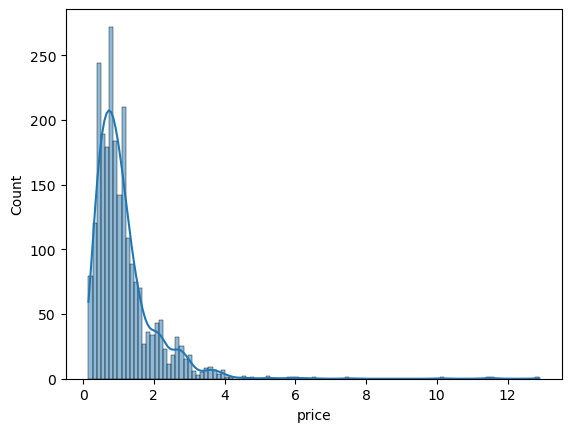

In [143]:
print(f"Skewness: { df['price'].skew() }")
sns.histplot(x = df['price'],kde=True)
plt.show()

Skewness: 1.058626913241559


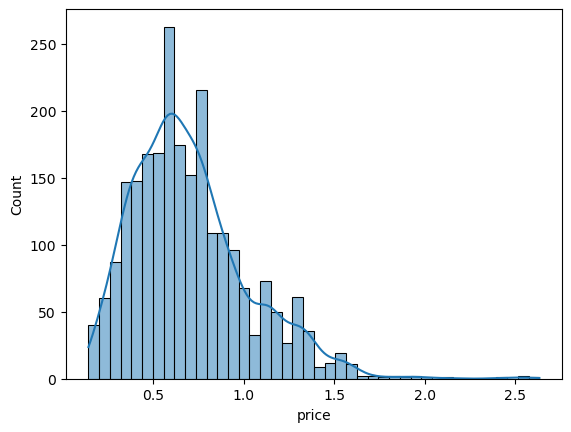

In [144]:
print(f"Skewness: {np.log1p(df['price']).skew() }")
sns.histplot(x = np.log1p(df['price']),kde=True)
plt.show()

In [145]:
df.to_csv('data/clean/v2/mhl/flats-mhl-with-extra-address.csv',index = False)

In [146]:
df.drop(columns = ['address1','address2'],inplace = True)

In [147]:
df.to_csv('data/clean/v2/mhl/flats-mhl-clean-v2.csv',index = False)